In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trips = pd.read_csv('data/trip.csv')
weather = pd.read_csv('data/weather.csv')
stations = pd.read_csv('data/station.csv')
#status = pd.read_csv('data/status.csv', low_memory= False)

In [3]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [4]:
trips.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,6.699590e+05,669959.000000,669959.000000,669959.000000
mean,460382.009899,1.107950e+03,57.851876,57.837438,427.587620
std,264584.458487,2.225544e+04,17.112474,17.200142,153.450988
min,4069.000000,6.000000e+01,2.000000,2.000000,9.000000
25%,231082.500000,3.440000e+02,50.000000,50.000000,334.000000
50%,459274.000000,5.170000e+02,62.000000,62.000000,440.000000
75%,692601.000000,7.550000e+02,70.000000,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000


In [5]:
trips.duration.describe()

count    6.699590e+05
mean     1.107950e+03
std      2.225544e+04
min      6.000000e+01
25%      3.440000e+02
50%      5.170000e+02
75%      7.550000e+02
max      1.727040e+07
Name: duration, dtype: float64

In [6]:
# Paso duration a minutos.
trips.duration /= 60

In [7]:
trips.duration.describe()

count    669959.000000
mean         18.465831
std         370.923950
min           1.000000
25%           5.733333
50%           8.616667
75%          12.583333
max      287840.000000
Name: duration, dtype: float64

In [8]:
ochoHoras = 60 * 8
trips[trips.duration > ochoHoras].count()

id                    1886
duration              1886
start_date            1886
start_station_name    1886
start_station_id      1886
end_date              1886
end_station_name      1886
end_station_id        1886
bike_id               1886
subscription_type     1886
zip_code              1775
dtype: int64

In [47]:
trips.start_date = pd.to_datetime(trips.start_date, format='%m/%d/%Y %H:%M')
trips.end_date = pd.to_datetime(trips.end_date, format='%m/%d/%Y %H:%M')
trips["date"] = trips.start_date.dt.date
trips["startYear"] = trips.start_date.dt.year
trips["startMonth"] = trips.start_date.dt.month
trips["startWeekday"]  = trips.start_date.dt.weekday_name
trips["startWeekdayId"]  = trips.start_date.dt.weekday
trips["startHour"] = trips.start_date.dt.hour
trips["endHour"] = trips.end_date.dt.hour

In [10]:
diasDistintos = trips[trips.start_date.dt.date != trips.end_date.dt.date]

In [11]:
# Cuánta gente se 'robó' bicicletas
# (Consideramos robada cuando tardó + de 1 semana en devolver)
unaSemana = 60 * 24 * 7
ladrones = diasDistintos[diasDistintos.duration > unaSemana]

In [12]:
# No se roban tantas bicis.
ladrones.groupby('startYear').count()['id']

startYear
2013    2
2014    5
2015    6
Name: id, dtype: int64

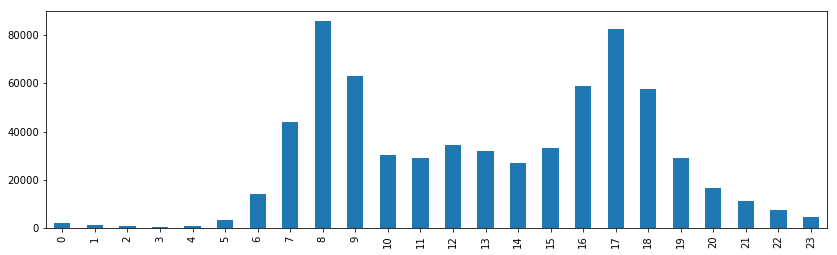

In [13]:
# Horas en las que se sacan las bicis
# Pareciera que se usan para ir a trabajar, por los picos a las 8 y 17hs10000
trips.startHour.value_counts().sort_index().plot(kind='bar',figsize=(14,4))

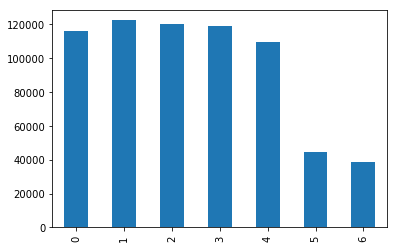

In [14]:
# Más indicios que se usan para trabajar, mucho más uso en la semana que los findes.
trips['startWeekdayId'].value_counts().sort_index().plot(kind='bar')

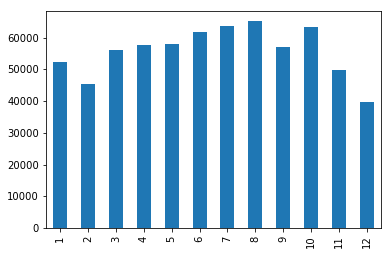

In [15]:
# Vemos cuales son los meses más comunes.
trips.startMonth.value_counts().sort_index().plot(kind='bar')

In [128]:
print (trips.columns)
alquiladasPorFecha = pd.DataFrame(trips.groupby('date').count()['id'])

alquiladasPorFecha['date'] = alquiladasPorFecha.index
alquiladasPorFecha.reset_index(drop = True, inplace = True)
alquiladasPorFecha.rename(columns={'id': 'alquiladas'}, inplace=True)
alquiladasPorFecha.date = pd.to_datetime(alquiladasPorFecha.date)
alquiladasPorFecha

Index(['id', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'subscription_type', 'zip_code', 'startYear', 'startMonth',
       'startWeekday', 'startWeekdayId', 'startHour', 'endHour', 'date'],
      dtype='object')


,alquiladas,date
0,748,2013-08-29
1,714,2013-08-30
2,640,2013-08-31
3,706,2013-09-01
4,661,2013-09-02
5,597,2013-09-03
6,606,2013-09-04
7,677,2013-09-05
8,814,2013-09-06
9,796,2013-09-07


# Miramos Dataframe weather

In [39]:
weather.date = pd.to_datetime(weather.date, format='%m/%d/%Y')
weather['year'] = weather.date.dt.year
weather['month'] = weather.date.dt.month
weather['day'] = weather.date.dt.day
#weather.drop(['max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches', 'min_sea_level_pressure_inches'],inplace=True, axis=1)
weather.columns

Index(['date', 'max_temperature_f', 'mean_temperature_f', 'min_temperature_f',
       'max_dew_point_f', 'mean_dew_point_f', 'min_dew_point_f',
       'max_humidity', 'mean_humidity', 'min_humidity', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph', 'max_gust_speed_mph', 'precipitation_inches',
       'cloud_cover', 'events', 'wind_dir_degrees', 'zip_code', 'year',
       'month', 'day'],
      dtype='object')

In [61]:
# Hay un ingreso por zip_code para cada fecha

print ("Los zip_codes son: ")
print (weather.zip_code.unique())

weather.groupby('date').count()['zip_code']

Los zip_codes son: 
[94107 94063 94301 94041 95113]


date
2013-08-29    5
2013-08-30    5
2013-08-31    5
2013-09-01    5
2013-09-02    5
2013-09-03    5
2013-09-04    5
2013-09-05    5
2013-09-06    5
2013-09-07    5
2013-09-08    5
2013-09-09    5
2013-09-10    5
2013-09-11    5
2013-09-12    5
2013-09-13    5
2013-09-14    5
2013-09-15    5
2013-09-16    5
2013-09-17    5
2013-09-18    5
2013-09-19    5
2013-09-20    5
2013-09-21    5
2013-09-22    5
2013-09-23    5
2013-09-24    5
2013-09-25    5
2013-09-26    5
2013-09-27    5
             ..
2015-08-02    5
2015-08-03    5
2015-08-04    5
2015-08-05    5
2015-08-06    5
2015-08-07    5
2015-08-08    5
2015-08-09    5
2015-08-10    5
2015-08-11    5
2015-08-12    5
2015-08-13    5
2015-08-14    5
2015-08-15    5
2015-08-16    5
2015-08-17    5
2015-08-18    5
2015-08-19    5
2015-08-20    5
2015-08-21    5
2015-08-22    5
2015-08-23    5
2015-08-24    5
2015-08-25    5
2015-08-26    5
2015-08-27    5
2015-08-28    5
2015-08-29    5
2015-08-30    5
2015-08-31    5
Name: zip_code, dty

In [65]:
# Vemos los datos para cada zip_code
for zc in weather.zip_code.unique():
    print ("zip_code: " + str(zc))
    print (weather[weather.zip_code == zc].isnull().sum())
    print ()

zip_code: 94107
date                       0
max_temperature_f          0
mean_temperature_f         0
min_temperature_f          0
max_dew_point_f            0
mean_dew_point_f           0
min_dew_point_f            0
max_humidity               0
mean_humidity              0
min_humidity               0
max_visibility_miles       0
mean_visibility_miles      0
min_visibility_miles       0
max_wind_Speed_mph         0
mean_wind_speed_mph        0
max_gust_speed_mph        13
precipitation_inches       0
cloud_cover                0
events                   574
wind_dir_degrees           0
zip_code                   0
year                       0
month                      0
day                        0
dtype: int64

zip_code: 94063
date                       0
max_temperature_f          0
mean_temperature_f         0
min_temperature_f          0
max_dew_point_f            0
mean_dew_point_f           0
min_dew_point_f            0
max_humidity               0
mean_humidity             

In [70]:
# Vamos a usar 94107 que es el que tiene los datos más limpios
weather = weather[weather.zip_code == 94107]
weather.drop('zip_code', inplace=True, axis=1)

In [72]:
weather.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'], dtype=object)

In [73]:
weather.loc[weather.events == 'rain', 'events'] = "Rain"
weather.loc[weather.events.isnull(), 'events'] = "Normal"

In [80]:
def toCelsius(fahrenheit):
    return (fahrenheit - 32) / 1.8

In [81]:
# Pasamos las temperaturas a farenheit
for column in weather.columns:
    if "_f" in column:
        weather[column] = weather[column].apply(toCelsius)

weather.rename(columns=lambda x: x.replace("_f", "_c"), inplace=True)

In [87]:
# Tienen sentido las temperaturas
weather.max_temperature_c.describe()

count    733.000000
mean      20.222071
std        4.039283
min        8.333333
25%       17.222222
50%       20.000000
75%       22.777778
max       33.888889
Name: max_temperature_c, dtype: float64

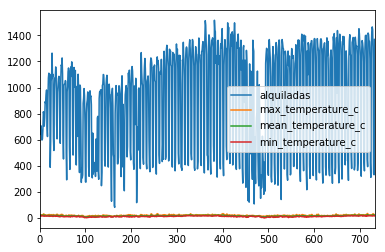

In [136]:
# Veamos si hay relación entre temperatura y cantidad de bicis alquiladas
relacion = alquiladasPorFecha.merge(weather, on='date')
relacion = relacion[['alquiladas', 'date', 'max_temperature_c', 'mean_temperature_c', 'min_temperature_c']]
relacion.plot()